In [1]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
from random import randint

# Martingales

The goal of this notebook is to explore some martingales. We will first view a few of the examples introduced in the lecture, namely the random walk, the quadratic martingale and the multiplicative martingale. All of these can be defined using the same sequence of i.i.d. random variables, and then dividing or substracting the mean, depending on the necessary conditions. We will use a vector $X_i$ of i.i.d. binomial random variables with parameters $n$ and $p$. Moreover we will sample each martingale for $steps$ many steps. Feel free to change these parameters as you wish! Below one of these samples is printed, but we will resample the sequence for each example.

In [2]:
# length of the sample
steps = 100

# parameters of the binomial distribution
n = 4
p = 0.3

X = np.random.binomial(n,p,steps)
print("X = " + str(X))

X = [1 3 1 2 2 1 2 0 2 2 1 1 1 2 0 1 2 1 0 1 1 2 1 3 0 0 2 0 2 2 0 2 0 1 0 1 3
 0 1 1 3 1 1 0 1 1 0 1 2 2 1 2 0 0 1 0 1 1 1 3 3 3 3 1 1 0 2 3 1 1 2 1 0 0
 0 0 3 1 0 3 1 2 2 2 2 0 0 0 2 1 1 1 2 2 2 0 1 1 0 1]


## Random walk

The first martingale we consider is the random walk: Take a sequence $X_i$ of i.i.d. random variables with mean $\mu$, and set $S_k = \sum_{i = 1}^k X_i$ then setting $W_0 = 0$ and $W_k = S_k - k \mu $ for $k \geq 1$ is a martingale with respect to $(X_k)_{k \in \mathbb{N}}$. Recall that the expected value of a martingale stays constant, and in this case the expected value is constantly $0$, since $W_0 = 0$.

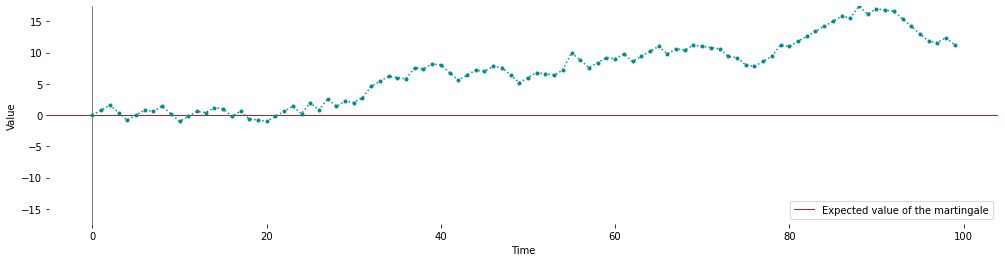

In [3]:
# simple random walk

# length of the sample
steps = 100

# parameters of the binomial distribution
n = 4
p = 0.3

X = np.random.binomial(n,p,steps)

# ---------- remove the "#" below if you want to see the sequence that is used to construct the martingale ---------
# print("X = " + str(X))

# This will be used to save the values of our martingale.
W = np.zeros(steps)

for i in range(0,steps-1):
    W[i+1] = W[i] + X[i] - n*p

# create the figure we will add the plots to
plt.figure(figsize=(17, 4))  
# Remove the plot frame lines.
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

#Label axes and put in ticks
plt.ylabel('Value')
plt.xlabel('Time')
plt.ylim((-max(abs(W)),max(abs(W))))

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.axhline(y = 0, color='firebrick', linestyle='-', linewidth = 1, label = 'Expected value of the martingale');
plt.axvline(x = 0, color='black', linestyle='-', linewidth = 0.5);
ax.plot(W, linestyle= 'dotted', marker='.', alpha = 1, color = "darkcyan")
plt.legend();

## Quadratic Martingale

The second example we look at is the quadratic martingale. As before we start with a sequence of i.i.d. random variables, but here we need the random variables to have mean 0, so instead we will use $Y_i = X_i - \mathbb{E}[X_i]$. Let also $\sigma^2 = Var(X_i)$. Then setting $S_k = \sum_{i = 1}^k Y_i$ we have that $V_k = S_k^2 - k\sigma^2$, is a martingale with respect to $(Y_k)_{k \in \mathbb{N}}$. Below you can see one sample path of this martingale.

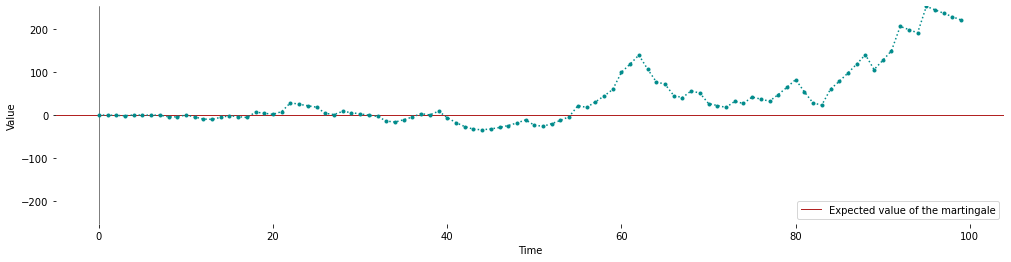

In [4]:
# quadratic_martingale

# length of the sample
steps = 100

# parameters of the binomial distribution
n = 4
p = 0.3

X = np.random.binomial(n,p,steps)

# ---------- remove the "#" below if you want to see the sequence that is used to construct the martingale ---------
# print("Y = " + str(X - n*p))

# This will be used to save the values of our martingale.
V = np.zeros(steps)

for i in range(0,steps-1):
    V[i+1] = sum(X[0:i] - n*p)**2 - i*n*p*(1-p)
    
# create the figure we will add the plots to
plt.figure(figsize=(17, 4))  
# Remove the plot frame lines.
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

#Label axes and put in ticks
plt.ylabel('Value')
plt.xlabel('Time')
plt.ylim((-max(abs(V)),max(abs(V))))

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.axhline(y = 0, color='firebrick', linestyle='-', linewidth = 1, label = 'Expected value of the martingale');
plt.axvline(x = 0, color='black', linestyle='-', linewidth = 0.5);
ax.plot(V, linestyle= 'dotted', marker='.', alpha = 1, color = "darkcyan")
plt.legend();

## Multiplicative Martingale

### First version: Multiplicative martingale with random variables that can be 0

Let us finally look at the multiplicative martingale, which can be used to model the evolution of a stock price in time. In this case we again start with a sequence of i.i.d. random variables, but now we need these to have expected value 1. So we will use $U_i = \frac{X_i}{\mathbb{E}[X_i]}$ here. Setting the initial value to be $M_0 = 1$, we then have that $M_k = U_0 \cdot U_1 \cdots U_k$ is a martingale with respect to $(U_k)_{k \in \mathbb{N}}$. Below you can see one sample path of this martingale, and it's expected value, which is equal to 1 at all times.

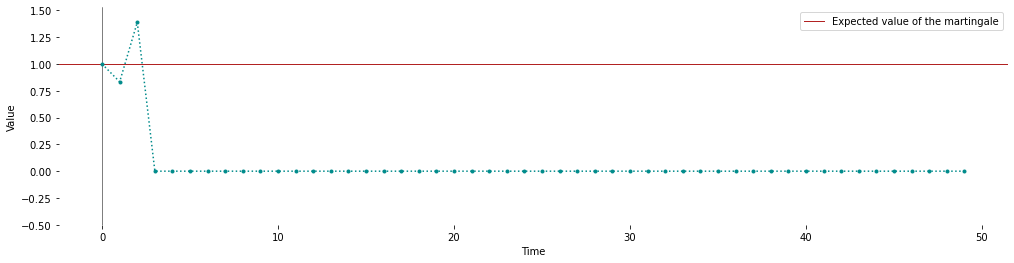

In [5]:
# multiplicative_binomial_martingale

# length of the sample
steps = 50

# parameters of the binomial distribution
n = 4
p = 0.3

X = np.random.binomial(n,p,steps)

# ---------- remove the "#" below if you want to see the sequence that is used to construct the martingale ---------
# print("U = " + str(X/(n*p)))

# This will be used to save the values of our martingale.
M = np.zeros(steps)
M[0] = 1

for i in range(0,steps-1):
    M[i+1] = M[i]*((X[i])/(n*p))
    
# create the figure we will add the plots to
plt.figure(figsize=(17, 4))  
# Remove the plot frame lines.
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

#Label axes and put in ticks
plt.ylabel('Value')
plt.xlabel('Time')
plt.ylim((-0.5,max(abs(M))+max(abs(M)/10)))

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.axhline(y = 1, color='firebrick', linestyle='-', linewidth = 1, label = 'Expected value of the martingale');
plt.axvline(x = 0, color='black', linestyle='-', linewidth = 0.5);
ax.plot(M, linestyle= 'dotted', marker='.', alpha = 1, color = "darkcyan")
plt.legend();

As you can see by rerunning the cell a few times, most samples will be equal to 0 pretty quickly. You might think that this is not true if the random variable used cannot actually be equal to 0. But this is not the case: even if we shift the binomial by 1, so that we never get a term that is actually equal to 0, we see the same phenomenon happening. Let's call this the second version of the multplicative martingale.

### Second version: Multiplicative martingale with positive random variables

In this version, we define the martingale as above, but based on the i.i.d. sequence $U_i = \frac{X_i + 1}{\mathbb{E}[X_i] +1}$, so none of the terms we multiply with can ever be equal to 0. As beforem the expected value is 1 at all times $k$.

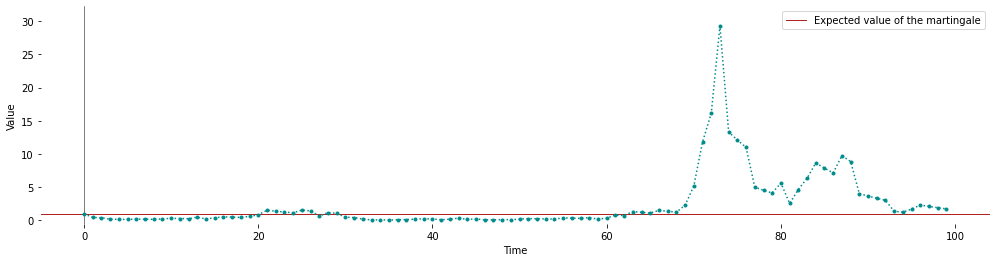

In [6]:
# multiplicative_binomial_martingale

# length of the sample
steps = 100

# parameters of the binomial distribution
n = 4
p = 0.3

X = np.random.binomial(n,p,steps)

# ---------- remove the "#" below if you want to see the sequence that is used to construct the martingale ---------
# print("U = " + str((X + 1)/(n*p+1)))

# This will be used to save the values of our martingale.
M = np.zeros(steps)
M[0] = 1

for i in range(0,steps-1):
    M[i+1] = M[i]*((X[i]+1)/(n*p+1))
    
# create the figure we will add the plots to
plt.figure(figsize=(17, 4))  
# Remove the plot frame lines.
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

#Label axes and put in ticks
plt.ylabel('Value')
plt.xlabel('Time')
plt.ylim((-0.5,max(abs(M))+max(abs(M)/10)))

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.axhline(y = 1, color='firebrick', linestyle='-', linewidth = 1, label = 'Expected value of the martingale');
plt.axvline(x = 0, color='black', linestyle='-', linewidth = 0.5);
ax.plot(M, linestyle= 'dotted', marker='.', alpha = 1, color = "darkcyan")
plt.legend();

As you can see, this martingale also becomes 0 pretty fast for most samples. Using an argument similar to the one in exercise D 5.4, together with Jensen's inequality, you can actually prove that the above behaviour holds for any distribution that is not a constant. If you are interested, let me know!

## The expected value is constant

The definition of a martingale includes the property that, given the current state, the next state will stay the same, in expected value. As I mentioned above, this implies that the expected value stays the same at all times. This might not have been visible from viewing a few single sample paths above, since their paths vary quite a lot. But based on the law of large numbers, the property can be seen pretty clearly by sampling several of these paths and then looking at their average, so let's do this for the examples from above. The parameters are the same as before: $n$ and $p$ for the binomial distribution of the random variables we build the martingales from, $steps$ for the length of the sample paths, and in addition there is a parameter $reps$ that determines how many samples are taken.

### Random walk

We first visualize this property for the random walk. You might want to increase the number of samples to see the average converge to 0 for all times in our sample.

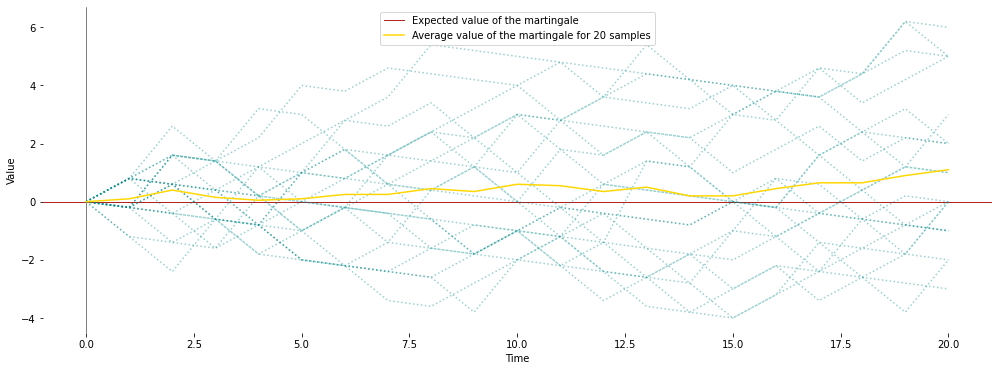

In [7]:
# length of the sample
steps = 20

# parameters of the binomial distribution
n = 4
p = 0.3

# number of samples
reps = 20

# create the figure we will add the plots to
plt.figure(figsize=(17, 6))  
# Remove the plot frame lines.
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

#Label axes and put in ticks
plt.ylabel('Value')
plt.xlabel('Time')
#plt.axis([-0.5, steps+1, -0.2, np.shape(P)[1]-0.8])
#plt.xticks(np.arange(0, steps+1, step=max(1,np.floor(steps/20))));
#plt.yticks(np.arange(0, np.shape(P)[1] , step = 1));  

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.axhline(y = 0, color='firebrick', linestyle='-', linewidth = 1, label = 'Expected value of the martingale');
plt.axvline(x = 0, color='black', linestyle='-', linewidth = 0.5);

av = np.zeros(steps+1)

for r in range(0,reps):

    X = np.random.binomial(n,p,steps+1)

    W = np.zeros(steps+1)

    for i in range(0,steps):
        W[i+1] = W[i] + X[i] - n*p
    
    av = av + W

    # Choose style of the lines
    ax.plot(W, linestyle= 'dotted', marker='', alpha = min(30/reps,0.4), color = "darkcyan")
    
av = av/reps
ax.plot(av, linestyle = 'solid', color = 'gold', label = 'Average value of the martingale for ' +str(reps) + " samples")
plt.legend(loc = "upper center");

### Quadratic martingale

Similarly we can see that the quadratic martingale's expected value is 0 at all times by looking at the average of a few samples.

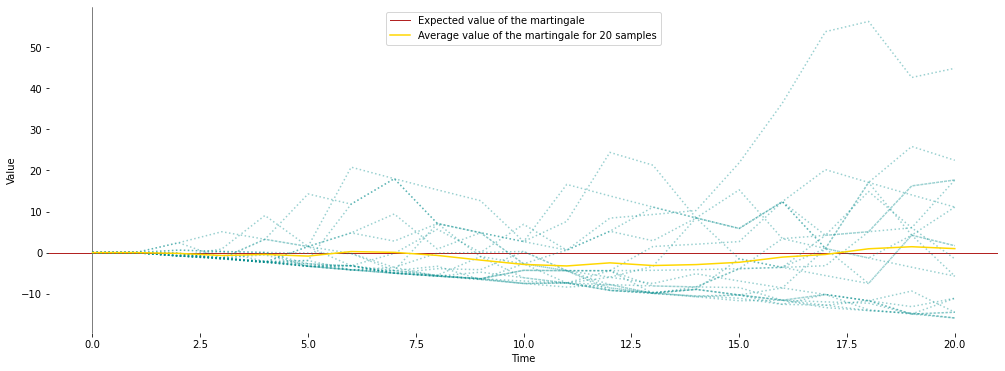

In [8]:
# length of the sample
steps = 20

# parameters of the binomial distribution
n = 4
p = 0.3

# number of samples
reps = 20

# create the figure we will add the plots to
plt.figure(figsize=(17, 6))  
# Remove the plot frame lines.
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

#Label axes and put in ticks
plt.ylabel('Value')
plt.xlabel('Time')
#plt.axis([-0.5, steps+1, -0.2, np.shape(P)[1]-0.8])
#plt.xticks(np.arange(0, steps+1, step=max(1,np.floor(steps/20))));
#plt.yticks(np.arange(0, np.shape(P)[1] , step = 1));  

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.axhline(y = 0, color='firebrick', linestyle='-', linewidth = 1, label = 'Expected value of the martingale');
plt.axvline(x = 0, color='black', linestyle='-', linewidth = 0.5);

av = np.zeros(steps+1)

for r in range(0,reps):
    
    X = np.random.binomial(n,p,steps+1)

    Y = np.zeros(steps+1)

    for i in range(0,steps):
        Y[i+1] = sum(X[0:i] - n*p)**2 - (i)*n*p*(1-p)
    
    av = av + Y

    # Choose style of the lines
    ax.plot(Y, linestyle= 'dotted', marker='', alpha = min(30/reps,0.4), color = "darkcyan")
av = av/reps
ax.plot(av, linestyle = 'solid', color = 'gold', label='Average value of the martingale for ' + str(reps) +' samples')
plt.legend(loc = "upper center");

### Multiplicative martingale with Bernoulli random variables

The martingale for which it is probably most surprising that it stays constant on average is the multiplicative one. As we (will) have seen in sections, the multiplicative martingale with Bernoulli random variables will be 0 in the limit, with probability 1. Nonetheless, at any fixed time, the expected value of the martingale is 1. The plot below illustrates this. I kept the number of repetitions low, so that the individual paths are still visible, but you will need to increase it to actually see the average converge to the mean value of 1.

Here we plot the sample paths and the average separately so that we can see the convergence in a clearer way.

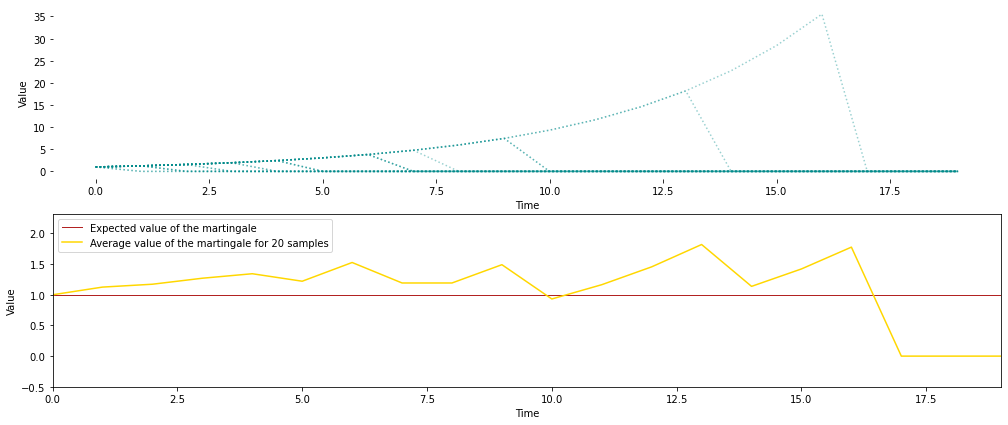

In [9]:
# length of the sample
steps = 20

# parameters of the binomial distribution
n = 1
p = 0.8

# number of samples
reps = 20

# create the figure we will add the plots to
plt.figure(figsize=(17, 7)) 

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

av = np.zeros(steps)
ax = plt.subplot(2,1,1)  
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

plt.xlabel("Time")
plt.ylabel("Value")

for r in range(0,reps):
    # we will use this to save the states
    X = np.random.binomial(n,p,steps)

    M = np.zeros(steps)
    M[0] = 1

    for i in range(0,steps-1):
        M[i+1] = M[i]*((X[i])/(n*p))
    
    av = av + M

    # Choose style of the lines
    ax.plot(M, linestyle= 'dotted', marker='', alpha = min(30/reps,0.4), color = "darkcyan")
    
av = av/reps
ax = plt.subplot(2,1,2)
ax.spines["top"].set_visible(True)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(True)    
ax.spines["left"].set_visible(True) 
# ax.set_yticks(np.arange(0, np.shape(P)[1] , step = 1))
ax.set_ylim((0, max(2,max(av))))
plt.axhline(y = 1, color='firebrick', linestyle='-', linewidth = 1, label = 'Expected value of the martingale')
ax.plot(av, linestyle = 'solid', color = "gold", label = "Average value of the martingale for " + str(reps) + " samples")
plt.ylim((-0.5,max(av)+0.5))
plt.xlim((0, steps-1))
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend();

You will probably see in the plot above that the average is kept at one thanks to a few samples that achieve a very high value. This is even more visible if you increase the time horizon. On the other hand you will be able to see that the expected value does really stay constantly by increasing the number of samples.

### Multiplicative martingale with positive random variables

As I mentioned before the multiplicative martingale will also tend to 0 when it is defined using strictly positive random variables. In the plots below we can see that it still also holds that the expected value at any time is 1.

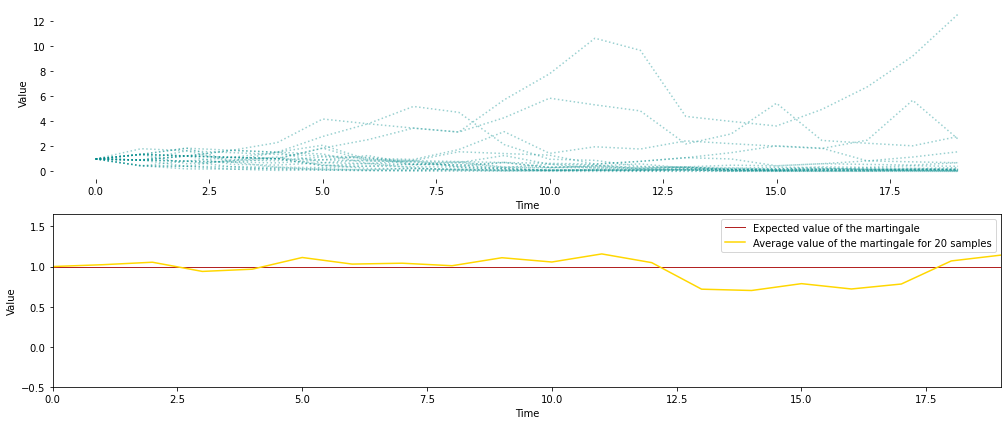

In [10]:
# length of the sample
steps = 20

# parameters of the binomial distribution
n = 4
p = 0.3

# number of samples
reps = 20

# create the figure we will add the plots to
plt.figure(figsize=(17, 7)) 

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

ax = plt.subplot(2,1,1)  
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
plt.xlabel("Time")
plt.ylabel("Value")
av = np.zeros(steps)

for r in range(0,reps):
    # we will use this to save the states
    X = np.random.binomial(n,p,steps)

    M = np.zeros(steps)
    M[0] = 1

    for i in range(0,steps-1):
        M[i+1] = M[i]*((X[i]+1)/(n*p+1))
    
    av = av + M

    # Choose style of the lines
    ax.plot(M, linestyle= 'dotted', marker='', alpha = min(30/reps,0.4), color = "darkcyan")
    
av = av/reps
ax = plt.subplot(2,1,2)
ax.spines["top"].set_visible(True)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(True)    
ax.spines["left"].set_visible(True) 
# ax.set_yticks(np.arange(0, np.shape(P)[1] , step = 1))
ax.set_ylim((0, max(2,max(av))))
plt.axhline(y = 1, color='firebrick', linestyle='-', linewidth = 1, label = 'Expected value of the martingale')
ax.plot(av, linestyle = 'solid', color = "gold", label = "Average value of the martingale for " + str(reps) + " samples")
plt.ylim((-0.5, max(av)+0.5))
plt.xlim((0, steps-1))
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend();

As before, looking at a few samples and playing with the length and the number of samples will show that a few exceptionally high paths are the reason the mean can stay constant while the martingale converges to 0.

## Double or nothing

After these introductory visualizations, we want to look into one of the famous examples of martingales: the strategy of doubling your bet until your first win. More precisey, we assume that there is a set of games a gambler can bet on. The odds are slightly against the gambler, in our case we will model this with $Bernoulli(0.45)$ random variables. The strategy of the gambler is to start with a bet of 1 and then double the bet every time they lose. Thus when they win for the first time, the will have a profit of 1. They then repeat this strategy, i.e. they start again with 1. The idea was covered in lectures and you can also see [wikipedia](https://en.wikipedia.org/wiki/Martingale_(betting_system)) for a short treatment. 

We first look at one instance of the evolution of the fortune of a gambler employing this strategy. We assume that the gambler starts with a fortune of 20, but also has an infinite "fund" they can use for their bets, i.e. there is no limit to the height of their bets. The parameters below are the same as before. In addition to the plot of the bets and the evolution of the fortune of the gambler, the cell below outputs 
- the sequence of outcomes of the games, with $0$ being a loss for the gambler, and $1$ a win,
- the sequence of bets the gambler places
- the evolution of the fortune of the gambler
- the number of times the gambler restarts with a bet of 1.

Outcomes of the game: [0 0 0 0 0 1 0 0 0 1 1 1 0 1 0]
Height of the bet: [ 1.  2.  4.  8. 16. 32.  1.  2.  4.  8.  1.  1.  1.  2.  1.  2.]
Fortune of the gambler: [ 20.  19.  17.  13.   5. -11.  21.  20.  18.  14.  22.  23.  24.  23.
  25.  24.]
Times gambler restarted with a bet of 1: 5


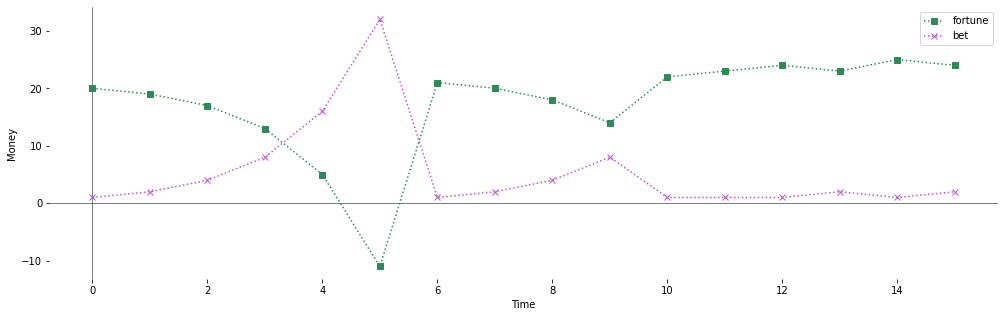

In [11]:
# length of the sample
steps = 15

# parameters of the binomial distribution for the bets
n = 1
p = 0.45

X = np.random.binomial(n,p,steps)
print("Outcomes of the game: " + str(X))

F = np.zeros(steps+1)
F[0] = 20

H = np.zeros(steps+1)
H[0] = 1

for i in range(0,steps):
    F[i+1] = F[i] + H[i]*(2*X[i]-1)
    if (X[i] == 0):
        H[i+1] = 2*H[i]
    else:
        H[i+1] = 1

print("Height of the bet: " + str(H))
print("Fortune of the gambler: " + str(F))
print("Times gambler restarted with a bet of 1: " + str(sum(X)))

# create the figure we will add the plots to
plt.figure(figsize=(17, 5))  
# Remove the plot frame lines.
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

#Label axes and put in ticks
plt.ylabel('Money')
plt.xlabel('Time')
#plt.axis([-0.5, steps+1, -0.2, np.shape(P)[1]-0.8])
#plt.xticks(np.arange(0, steps+1, step=max(1,np.floor(steps/20))));
#plt.yticks(np.arange(0, np.shape(P)[1] , step = 1));  

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.axhline(y = 0, color='black', linestyle='-', linewidth = 0.5);
plt.axvline(x = 0, color='black', linestyle='-', linewidth = 0.5);

plt.plot(F, linestyle= 'dotted', marker='s', alpha = 1, color = "seagreen", label = 'fortune')
plt.plot(H, linestyle= 'dotted', marker='x', alpha = 1, color = "mediumorchid", label = 'bet')
plt.legend();

By rerunning the cell you will probably see a wide range of evolutions of bets and fortune, including some where the fortune becomes negative. Maybe increase the step size to get a better sense of the general tendency. 

As you probably guessed, we next look at a larger number of samples of the evolution of the fortune of the gambler and the average of these over time. 

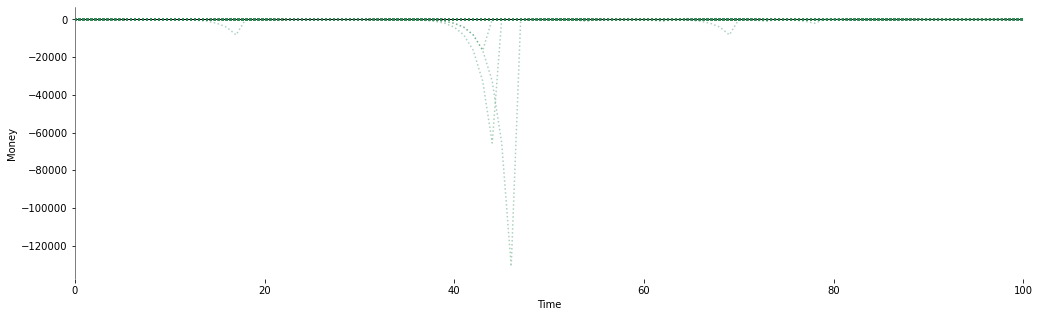

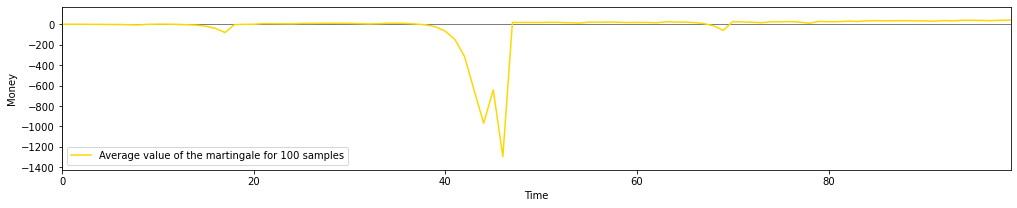

In [12]:
# length of the sample
steps = 100

# parameters of the binomial distribution
n = 1
p = 0.45

# number of sample paths
reps = 100

# create the figure we will add the plots to
plt.figure(figsize=(17, 5))  
# Remove the plot frame lines.
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

#Label axes and put in ticks
plt.ylabel('Money')
plt.xlabel('Time')
plt.xlim(0,steps)

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.axhline(y = 0, color='black', linestyle='-', linewidth = 1);
plt.axvline(x = 0, color='black', linestyle='-', linewidth = 0.5);

av = np.zeros(steps+1)

for r in range(0,reps):
    X = np.random.binomial(n,p,steps)

    F = np.zeros(steps+1)
    F[0] = 0

    H = np.zeros(steps+1)
    H[0] = 1
    restart = 0
    for i in range(0,steps):
        F[i+1] = F[i] + H[i]*(2*X[i]-1)
        if (X[i] == 0):
            H[i+1] = 2*H[i]
        else:
            H[i+1] = 1
            restart = restart + 1
    av = av + F
    plt.plot(F, linestyle= 'dotted', marker='', alpha = 0.4, color = "seagreen", label = 'fortune')

    
av = av/reps

plt.figure(figsize=(17, 3)) 
ax = plt.subplot(111)    
ax.spines["top"].set_visible(True)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(True)    
ax.spines["left"].set_visible(True)    
plt.axhline(y = 0, color='black', linestyle='-', linewidth = 0.5);
plt.axvline(x = 0, color='black', linestyle='-', linewidth = 0.5);
plt.ylabel('Money')
plt.xlabel('Time')
plt.plot(av, linestyle = 'solid', color = "gold", label = "Average value of the martingale for " + str(reps) + " samples")
plt.ylim((min(-2,min(av) - max(abs(av))/10), max(av) + max(abs(av))/10));
plt.xlim((0,steps-1))
plt.legend();


Play around with the number of steps and sample size to get a sense of the behaviour of this betting scheme. Pay specific attention to the sharp drops in fortune and how low the fortune goes at those times.

### Double or nothing with a finite starting budget

Let us now assume that the person betting has a starting fortune, and whatever fortune the gambler has at a time limits the amount they can bet. Once they lose all their money, they cannot place anymore bets and their fortune stays 0. This parameter is called $cap$ below, and you can change it if you want. As before, the cell prints not only the plot, but also the sequence of games, bets and fortune.

Outcomes of the game: [0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0]
Height of the bet: [1. 2. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Fortune of the gambler: [7. 6. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


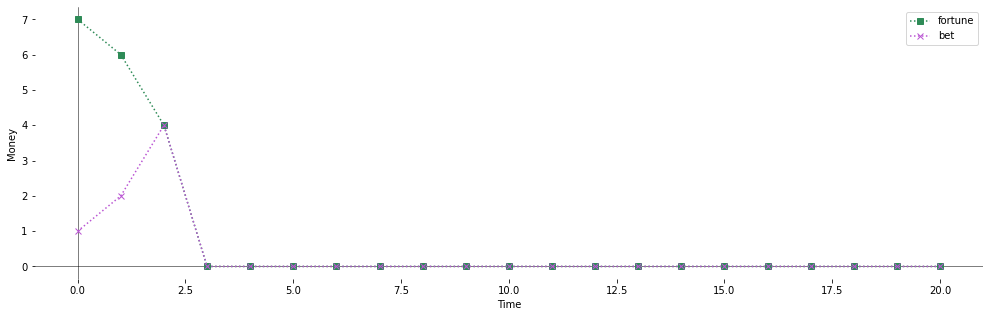

In [13]:
# length of the sample
steps = 20

# parameters of the binomial distribution
n = 1
p = 0.45

# starting budget
cap = 20

X = np.random.binomial(n,p,steps)
print("Outcomes of the game: " + str(X))

F = np.zeros(steps+1)
F[0] = 7

H = np.zeros(steps+1)
H[0] = 1
restart = 0

for i in range(0,steps):
    F[i+1] = max(F[i] + H[i]*(2*X[i]-1),0)
    if F[i+1] == 0:
        break
    elif (X[i] == 0) & (F[i+1] > 2*H[i]-1):
        H[i+1] = 2*H[i]
    elif (X[i] == 0) & (F[i+1] < 2*H[i]):
        H[i+1] = F[i+1]
    elif X[i] == 1:
        H[i+1] = 1
    else:
        print("error")

print("Height of the bet: " + str(H))
print("Fortune of the gambler: " + str(F))

# create the figure we will add the plots to
plt.figure(figsize=(17, 5))  
# Remove the plot frame lines.
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

#Label axes and put in ticks
plt.ylabel('Money')
plt.xlabel('Time')
#plt.axis([-0.5, steps+1, -0.2, np.shape(P)[1]-0.8])
#plt.xticks(np.arange(0, steps+1, step=max(1,np.floor(steps/20))));
#plt.yticks(np.arange(0, np.shape(P)[1] , step = 1));  

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.axhline(y = 0, color='black', linestyle='-', linewidth = 0.5);
plt.axvline(x = 0, color='black', linestyle='-', linewidth = 0.5);

plt.plot(F, linestyle= 'dotted', marker='s', alpha = 1, color = "seagreen", label = 'fortune')
plt.plot(H, linestyle= 'dotted', marker='x', alpha = 1, color = "mediumorchid", label = 'bet')
plt.legend();

If you rerun the cell a few times you will probably encounter samples where the gambler looses all their money. (The starting fortune of the gamblers might seem to be too low to be realistic, but if we started with a higher fortune, the same behaviour would appear, albeit on a longer timescale.)

As before we want to see how the gambler does on average, so we sample $rep$ many paths and look at their average. Please feel again free to change the number of steps and the number of samples.

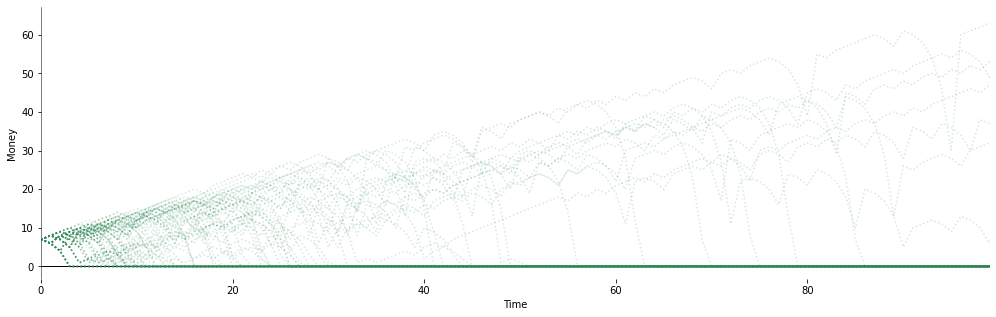

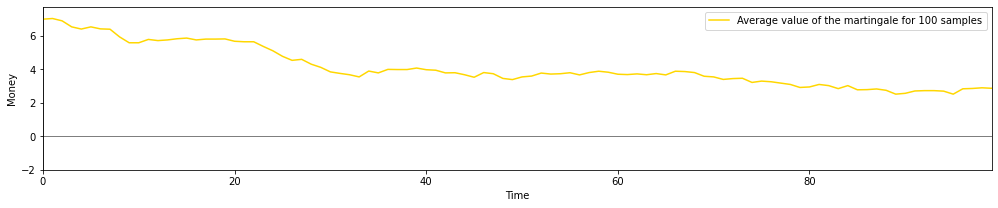

In [14]:
# length of the sample
steps = 100

# parameters of the binomial distribution
n = 1
p = 0.48

# starting budget
cap = 7

# number of samples
reps = 100

# create the figure we will add the plots to
plt.figure(figsize=(17, 5))  
# Remove the plot frame lines.
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.xlim(0,steps-1)

#Label axes and put in ticks
plt.ylabel('Money')
plt.xlabel('Time')

# Ensure that the axis ticks only show up on the bottom and left of the plot.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.axhline(y = 0, color='black', linestyle='-', linewidth = 1);
plt.axvline(x = 0, color='black', linestyle='-', linewidth = 0.5); 

av = np.zeros(steps+1)

ruin = 0

for r in range(0,reps):
    X = np.random.binomial(n,p,steps)

    F = np.zeros(steps+1)
    F[0] = cap

    H = np.zeros(steps+1)
    H[0] = 1

    for i in range(0,steps):
        F[i+1] = max(F[i] + H[i]*(2*X[i]-1),0)
        if F[i+1] == 0:
            ruin = ruin + 1
            break
        elif (X[i] == 0) & (F[i+1] > 2*H[i]-1):
            H[i+1] = 2*H[i]
        elif (X[i] == 0) & (F[i+1] < 2*H[i]):
            H[i+1] = F[i+1]
        elif X[i] == 1:
            H[i+1] = 1
        else:
            print("error")
        
    plt.plot(F, linestyle= 'dotted', marker='', alpha = 0.2, color = "seagreen", label = 'fortune')
    
    av = av+F
    
av = av/reps

plt.figure(figsize=(17, 3)) 
ax = plt.subplot(111)    
ax.spines["top"].set_visible(True)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(True)    
ax.spines["left"].set_visible(True)    
plt.axhline(y = 0, color='black', linestyle='-', linewidth = 0.5);
plt.axvline(x = 0, color='black', linestyle='-', linewidth = 0.5);
plt.ylabel('Money')
plt.xlabel('Time')
plt.plot(av, linestyle = 'solid', color = "gold", label = "Average value of the martingale for " + str(reps) + " samples")
plt.ylim((min(-2,min(av) - max(abs(av))/10), max(av)+max(abs(av))/10));
plt.xlim(0,steps-1)
plt.legend();

It is also informative to look at the number of players that got ruined:

In [15]:
print("Out of " + str(reps) + " players, " + str(ruin) + " ended up broke.")

Out of 100 players, 93 ended up broke.


**Question:** Was there anything that surprised you in the plots above? Compare the behaviour of the plots for the game with and without an infinite fund for bets. How do the plots of the samples and of the average look different? Can you recognize an upwards or downwards trend in either of them? Increasing the number of steps will probably help here. In each case try to evaluate what these trends are due to: very few people getting very lucky/unlucky or many people getting slightly lucky/unlucky?

This was the last notebook for Stat 150. As always any [feedback](https://docs.google.com/forms/d/e/1FAIpQLSe42BjDteeuBn_V4ABxSeQGid6ZzoEuydFmI7OvO2R1ap9T3g/viewform?usp=sf_link) would be very welcome! 